In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora
import numpy as np
import re
import os

In [2]:
## We import data associated to documents and claims and we merge them

df_doc = pd.read_csv('datasets/07_documents.csv')
df_claims = pd.read_csv('datasets/06_relevant_snippets.csv')
df_merge = pd.merge(df_doc[['snippet_id','document_content']],df_claims[
    ['claim_id','snippet_id','snippet_date','claim_content','claim_label','similarity_score']])

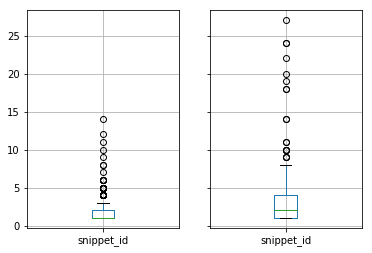

In [13]:
## What is the discrepancy between the number of snippets associated to true claims and those 
## of false claims ?

fig, axs = plt.subplots(1,2, sharey = True)
df_merge[df_merge['claim_label']==True][['claim_id','snippet_id']].groupby('claim_id').count()[['snippet_id']].boxplot(ax=axs[0])
df_merge[df_merge['claim_label']==False][['claim_id','snippet_id']].groupby('claim_id').count()[['snippet_id']].boxplot(ax=axs[1])

In [18]:
## We keep only claims with at least 2 associated snippets

df_count = df_merge[['claim_id','snippet_id']].groupby('claim_id').count().reset_index()

claim_ids_2 = df_count[df_count['snippet_id']>=2][['claim_id']]

df_filter = pd.merge(df_merge, claim_ids_2)

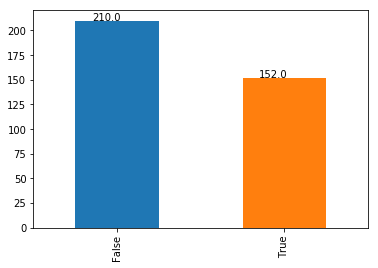

In [19]:
## How many true and false claims ?

ax = df_filter[['claim_id','claim_label']].groupby('claim_id').first().reset_index()['claim_label'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()*1000)/1000), (p.get_x() +0.1, p.get_height() +0.02))

In [21]:
## We select the false claims with the top mean similarity score

false_claim_ids_2 = df_filter[df_filter['claim_label']==False][['claim_id','similarity_score']].groupby('claim_id')\
.mean().reset_index().sort_values(by=['similarity_score'], ascending=False).head(152)['claim_id']
true_claim_ids_2 = df_filter[df_filter_2['claim_label']==True][['claim_id','claim_label']].groupby('claim_id')\
.first().reset_index()['claim_id']
claim_ids_2 = pd.DataFrame(pd.concat([false_claim_ids_2,true_claim_ids_2]))
df_filter_2 = pd.merge(df_filter,claim_ids_2)

152
152
304


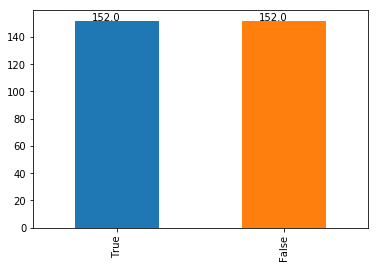

In [22]:
## How many true and false claims ?

ax = df_filter_2[['claim_id','claim_label']].groupby('claim_id').first().reset_index()['claim_label'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(int(p.get_height()*1000)/1000), (p.get_x() +0.1, p.get_height() +0.02))

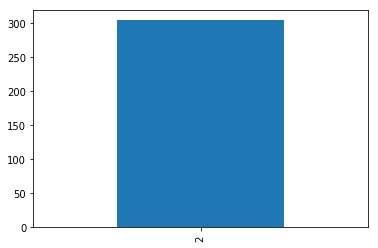

In [33]:
## We keep only the top two snippets per claim with maximum similarity scores

snippet_ids = df_filter_2[['claim_id','snippet_id','similarity_score']]\
.sort_values(by=['claim_id','similarity_score'],ascending=False).groupby('claim_id').head(2).reset_index()[['snippet_id']]


df_filter_3 = pd.merge(df_filter_2, snippet_ids)

In [35]:
## We export the data

df_filter_3.to_csv('data/08_documents.csv')